In [17]:
import tensorflow as tf
import numpy as np


In [18]:
import matplotlib.pyplot as plt
import pickle
import os
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import pandas as pd

In [19]:
db = pickle.load(open("dev_letter_D.p","rb"),encoding = "ISO-8859-1")

In [20]:
df = pd.DataFrame(db,columns=["images","classes","label"])

In [5]:
df["label"] = df["label"].replace("","X")
df["label"] = df["label"].replace(".","˙")

In [6]:
labels = df["label"].unique()

In [8]:
os.mkdir("images")

In [9]:
for label in labels:
    os.mkdir("images/"+label)

In [10]:
for image,label in zip(df["images"],df["label"]):
    img = Image.fromarray(image)
    path = "images/"+label+"/"+str(random.randint(1,7760))
    img.save(path+".jpg","JPEG",quality=100)


In [3]:
root_dir = "images/"

# Iterate over the subdirectories in the root directory
for subdir in os.listdir(root_dir):
  subdir_path = os.path.join(root_dir, subdir)
  
  # Check if the subdirectory is a directory
  if os.path.isdir(subdir_path):
    # Get a list of the files in the subdirectory
    files = os.listdir(subdir_path)
    
    # Sort the files by name
    files.sort()
    
    # Iterate over the files in the subdirectory
    for i, file in enumerate(files):
      # Get the old file path and new file path
      old_path = os.path.join(subdir_path, file)
      new_path = os.path.join(subdir_path, f"{i+1:03d}.jpg")
      
      # Rename the file
      os.rename(old_path, new_path)

In [23]:


data_dir = 'images/'

# Load the dataset
image_label_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='int',
  class_names=None,
  color_mode='grayscale',
  batch_size=32,
  image_size=(256, 256),
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset='training',
  interpolation='bilinear',
  follow_links=False
)



Found 7662 files belonging to 602 classes.
Using 6130 files for training.


In [24]:


 # Determine the sizes of the train, test, and validation sets
num_train_examples = int(tf.cast(0.6 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_test_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_val_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))

# Split the dataset into train, test, and validation sets
train_ds = image_label_ds.take(num_train_examples)
test_ds = image_label_ds.skip(num_train_examples).take(num_test_examples)
val_ds = image_label_ds.skip(num_train_examples + num_test_examples).take(num_val_examples)



In [25]:
class_names=['!', '"', "'", "''", ',', '-', '.a', ':', '?', 'DDa', 'Da', 'DaM', 'Daa', 'Dga', 'DgaM', 'Dh', 'Dha', 'DhaM', 'Di', 'Du', 'GYaa', 'GYii', 'Gyaa', 'H', 'I', 'M', 'N', 'N^ke', 'Na', 'NaH', 'NaM', 'Naa', 'NaaM', 'Ne', 'Ni', 'Nii', 'RRi', 'Rya', 'STa', 'STvaa', 'Sa', 'Saa', 'ShNa', 'ShTa', 'ShTaH', 'ShTaM', 'ShTaa', 'ShTaaH', 'ShTau', 'ShTe', 'ShTha', 'ShThaH', 'ShTiH', 'ShTiM', 'ShTu', 'ShTva', 'ShTvaa', 'ShTyaa', 'Sha', 'ShaH', 'ShaM', 'Shaa', 'ShaaH', 'She', 'Shi', 'ShtTya', 'Shta', 'ShtiiM', 'Shu', 'Shya', 'Shyaa', 'Sya', 'Syaa', 'TI', 'Ta', 'TaM', 'Te', 'Tha', 'Ti', 'Tii', 'TuH', 'VYA', 'X', 'a', 'aM', 'aa', 'au', 'ba', 'baa', 'bdha', 'bh', 'bha', 'bhaa', 'bhe', 'bhi', 'bhiH', 'bho', 'bhoo', 'bhu', 'bhuu', 'bhya', 'bhyaa', 'bhyaaM', 'bi', 'bo', 'bu', 'ch', 'chChA', 'chCha', 'chChaa', 'cha', 'chaa', 'chcha', 'chchh', 'chchha', 'chchii', 'che', 'chi', 'chiH', 'ci', 'dRRI', 'dRRi', 'da', 'daH', 'daM', 'daa', 'daaH', 'dau', 'dbhiH', 'ddha', 'ddhaH', 'ddhaa', 'ddhi', 'ddhu', 'de', 'dhRRi', 'dha', 'dhaM', 'dhaa', 'dhi', 'dhiH', 'dhii', 'dhu', 'dhuH', 'dhva', 'dhya', 'di', 'dii', 'diiM', 'dnyaa', 'do', 'dra', 'draH', 'draa', 'draaM', 'du', 'dva', 'dvaa', 'dvau', 'dvi', 'dya', 'dyaa', 'dye', 'dyu', 'e', 'ee', 'gRRi', 'ga', 'gaa', 'gha', 'ghi', 'ghii', 'gho', 'gi', 'gni', 'gra', 'graa', 'gre', 'gu', 'gyaa', 'h', 'hRRi', 'ha', 'haH', 'haM', 'haa', 'hau', 'he', 'hi', 'hii', 'ho', 'hu', 'huu', 'hya', 'hyaa', 'i', 'i ', 'ii', 'iti', 'ja', 'jaH', 'jaM', 'jaa', 'jaaH', 'je', 'ji', 'jii', 'jja', 'jji', 'jjii', 'jya', 'jyo', 'k', 'kRRi', 'kRii', 'kShaa', 'ka', 'kaH', 'kaM', 'kaa', 'kaaM', 'kai', 'ke', 'kha', 'khaa', 'khe', 'khi', 'khii', 'khyaa', 'khyaaH', 'ki', 'kiM', 'kii', 'kno', 'knu', 'ko', 'kra', 'kri', 'krii', 'kta', 'ktaM', 'ktau', 'kteH', 'kti', 'ktiH', 'ktiM', 'ktu', 'ktvaa', 'ku', 'kuu', 'kya', 'kyaM', 'l', 'la', 'laH', 'laM', 'laa', 'le', 'li', 'liM', 'lii', 'lo', 'lpa', 'lu', 'm', 'mRRi', 'ma', 'maH', 'maM', 'maa', 'maaM', 'mau', 'mba', 'mbe', 'mbhaa', 'me', 'mi', 'mii', 'mla', 'mmaa', 'moo', 'mpa', 'mra', 'mro', 'mu', 'muu', 'mya', 'myaa', 'n', 'nRRi', 'na', 'naH', 'naM', 'naa', 'naaM', 'nau', 'nda', 'ndaH', 'ndaM', 'ndaa', 'nde', 'ndha', 'ndhe', 'ndhre', 'ndhu', 'ndhuH', 'ndi', 'ndra', 'ndraH', 'ne', 'ni', 'nii', 'niiM', 'nma', 'nna', 'nnaH', 'nnaa', 'nnau', 'nni', 'nta', 'ntaH', 'ntaM', 'ntaa', 'ntau', 'nte', 'nti', 'ntii', 'nto', 'ntri', 'ntu', 'ntuM', 'ntya', 'ntyaa', 'ntyaaH', 'nu', 'nuu', 'nve', 'nya', 'nyaa', 'nye', 'o', 'oyaH', 'p', 'pRRi', 'pa', 'paH', 'paM', 'paa', 'paaM', 'pe', 'pha', 'pi', 'pii', 'pne', 'pno', 'pra', 'praa', 'pre', 'psya', 'pta', 'pte', 'pti', 'pu', 'puu', 'pya', 'r', 'rNa', 'rNi', 'ra', 'raH', 'raM', 'raa', 'raaM', 'rau', 'rbhe', 'rdha', 'rdhii', 're', 'rga', 'rge', 'rgha', 'rha', 'rhi', 'ri', 'riH', 'rii', 'rja', 'rjaa', 'rkha', 'rki', 'rma', 'ro', 'roo', 'rpa', 'rsha', 'rshaa', 'rshva', 'rshve', 'rta', 'rtaM', 'rtaa', 'rte', 'rtha', 'rthaM', 'rthi', 'rti', 'rtu', 'rtuM', 'rtya', 'ru', 'ruH', 'ruM', 'ruu', 'rva', 'rvaM', 'rve', 'rya', 'ryaM', 'ryaa', 'rye', 'ryo', 'sRRi', 'sa', 'saH', 'saM', 'saa', 'saaM', 'sai', 'sau', 'se', 'sh', 'shRRi', 'sha', 'shaH', 'shaM', 'shaa', 'shcha', 'shchi', 'she', 'shi', 'shlaa', 'shnaH', 'shr', 'shra', 'shrii', 'shru', 'shrvaa', 'shu', 'shva', 'si', 'siM', 'sii', 'skRRi', 'ska', 'skaH', 'smRRi', 'sma', 'smaa', 'smi', 'snaa', 'so', 'spa', 'sta', 'staM', 'staaM', 'ste', 'stha', 'sthaa', 'sthaaM', 'sthi', 'sti', 'stra', 'straa', 'stri', 'su', 'suu', 'sva', 'svaM', 'svaa', 'svii', 'sya', 'syaM', 'syaa', 'syaaH', 'syaaM', 't', 't!', 'tRRi', 'ta', 'taH', 'taM', 'taa', 'taaH', 'taaM', 'tah', 'taiH', 'tau', 'te', 'teeM', 'tha', 'thaH', 'thaM', 'thaa', 'ti', 'tiH', 'tiM', 'tii', 'tiiM', 'tkRRi', 'tkaa', 'tki', 'tma', 'tmaa', 'tnaM', 'tnii', 'tniiM', 'to', 'tpa', 'tpaa', 'tpuu', 'tra', 'traa', 'traaH', 'trai', 'tri', 'trii', 'troH', 'tryaaH', 'tsa', 'tsaa', 'tsu', 'tsya', 'tta', 'ttaH', 'ttaM', 'ttaaM', 'tti', 'tu', 'tuH', 'tuM', 'tuu', 'tva', 'tvaa', 'txa', 'tya', 'tyaM', 'tyaa', 'tyaaH', 'tyai', 'tye', 'u', 'uu', 'v', 'vRRi', 'va', 'vaH', 'vaM', 'vaa', 'vaaH', 'vaaM', 'vai', 've', 'vi', 'viH', 'vii', 'vra', 'vya', 'vyaH', 'vyaM', 'vyaa', 'xa', 'xaaH', 'xaaM', 'xe', 'xi', 'xii', 'xya', 'ya', 'yaH', 'yaM', 'yaa', 'yaaH', 'yaaM', 'yau', 'ye', 'yi', 'yo', 'yoH', 'yu', 'yuH', 'yyM', 'yya', 'yyaM', '~Nga', '~Ngu', '~Ngya', '~Nke', '~ncha', '~nchaa', '~nchi', '~nja', '˙']

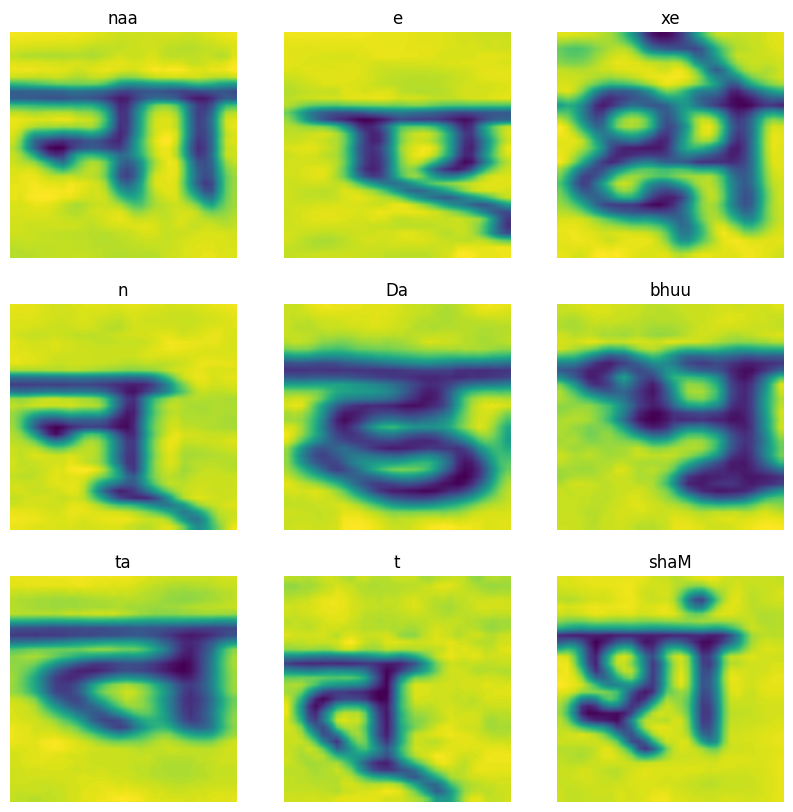

In [26]:
plt.figure(figsize=(10,10))
for images,labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [27]:


model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(602)
    ]
)



In [28]:

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [38]:
model2 = tf.keras.models.load_model("sanskrit.h5")

In [39]:
model2.predict(test_img)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.PngImagePlugin.PngImageFile'>, <class 'NoneType'>

In [40]:

model.fit(
     train_ds,
    validation_data = val_ds,
    epochs = 10 
)


Epoch 1/10


2023-02-18 16:52:41.224227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:433] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-02-18 16:52:41.226536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Possibly insufficient driver version: 510.108.3
2023-02-18 16:52:41.228453: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:621 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential_1/conv2d_3/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/gaurav/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/gaurav/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/gaurav/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/gaurav/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_159387/1763879011.py", line 1, in <module>
      model.fit(
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/gaurav/.local/lib/python3.10/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_3/Relu'
DNN library is not found.
	 [[{{node sequential_1/conv2d_3/Relu}}]] [Op:__inference_train_function_19936]